In [17]:
# 필요한 모듈들
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline   
import xlrd
import wbgapi as wb
from gedaTools import timeToInt

# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
totalDT = wb.data.DataFrame\
    (['SP.DYN.CONU.ZS', 'SG.GEN.PARL.ZS', 'SL.AGR.EMPL.FE.ZS', 'SL.IND.EMPL.FE.ZS', 'SL.SRV.EMPL.FE.ZS'],\
        skipBlanks=True, columns='series')

In [3]:
totDDT = totalDT.dropna(how='any')

In [4]:
totRST = totDDT.reset_index()

In [5]:
totRST

,economy,time,SG.GEN.PARL.ZS,SL.AGR.EMPL.FE.ZS,SL.IND.EMPL.FE.ZS,SL.SRV.EMPL.FE.ZS,SP.DYN.CONU.ZS
0,AFE,YR2000,14.800360,70.586327,5.304466,24.109204,26.671212
1,AFE,YR2010,22.642245,67.906247,4.942713,27.153256,28.137332
2,AFE,YR2017,28.705923,62.926304,5.148379,31.927219,39.685068
3,AFG,YR2005,27.309237,78.089996,11.530000,10.380000,13.600000
4,AFG,YR2006,27.309237,77.639999,11.800000,10.570000,18.600000
...,...,...,...,...,...,...,...
921,ZWE,YR2006,16.666667,71.790001,3.690000,24.520000,60.200000
922,ZWE,YR2009,14.953271,72.320000,3.210000,24.469999,64.900000
923,ZWE,YR2011,14.953271,71.650002,3.050000,25.299999,58.500000
924,ZWE,YR2014,31.481481,71.620003,2.240000,26.139999,66.900000


### 1차 시각화 : 각 분야와 피임 보급율의 시각화를 해봅시다. - 산포도

In [10]:
totH = totRST.iloc[:, 2:]
totH.columns = ['PARL', 'AGR', 'IND', 'SRV', 'DYN']
totH

,PARL,AGR,IND,SRV,DYN
0,14.800360,70.586327,5.304466,24.109204,26.671212
1,22.642245,67.906247,4.942713,27.153256,28.137332
2,28.705923,62.926304,5.148379,31.927219,39.685068
3,27.309237,78.089996,11.530000,10.380000,13.600000
4,27.309237,77.639999,11.800000,10.570000,18.600000
...,...,...,...,...,...
921,16.666667,71.790001,3.690000,24.520000,60.200000
922,14.953271,72.320000,3.210000,24.469999,64.900000
923,14.953271,71.650002,3.050000,25.299999,58.500000
924,31.481481,71.620003,2.240000,26.139999,66.900000


### 1차 시각화 : 각 분야와 피임 보급율의 시각화를 해봅시다. - 산포도

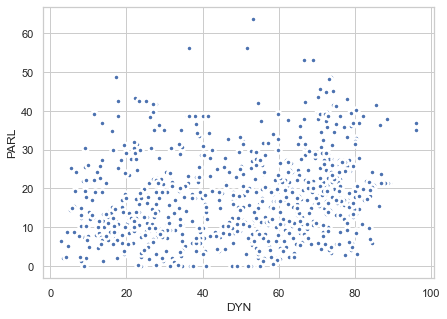

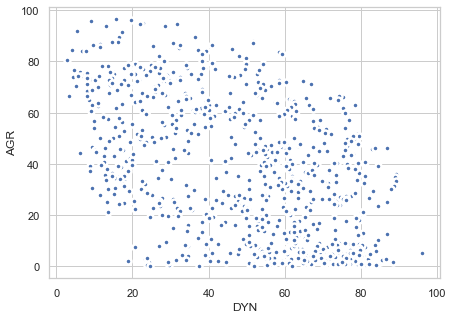

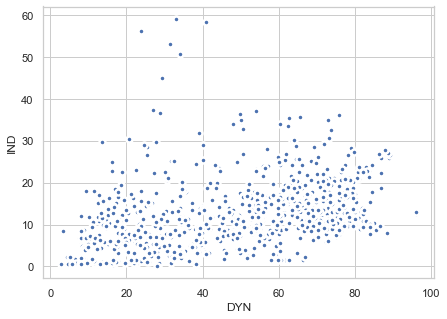

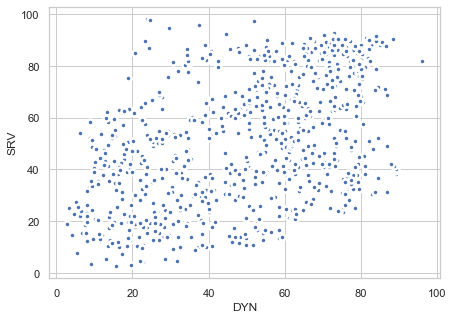

In [11]:
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='DYN', y='PARL', data=totH, linewidth=2.5)

plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='DYN', y='AGR', data=totH, linewidth=2.5)

plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='DYN', y='IND', data=totH, linewidth=2.5)

plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='DYN', y='SRV', data=totH, linewidth=2.5)

### 직군별로 분포도의 모양이 다름.
### 특히, AGR(농업)에서만 피임 보급율이 높아질수록
### 그 수가 적어지는 양상

### 1차 시각화 -2  : 히트맵

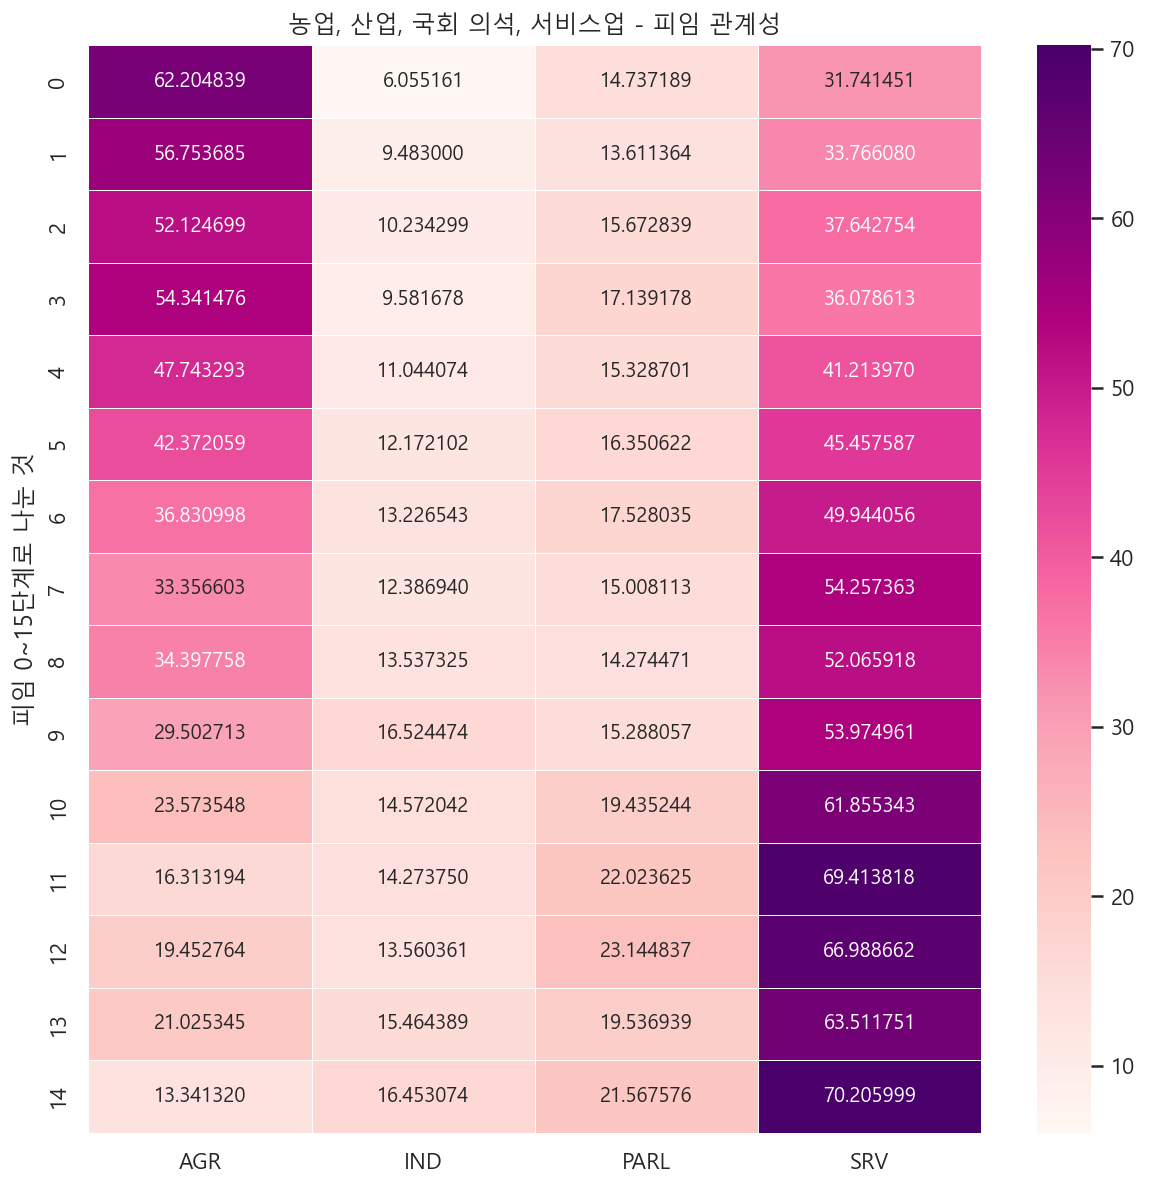

In [18]:
conPIV = totH.copy()
conPIV["DYNC"] = pd.qcut(conPIV["DYN"], 15, labels = [i for i in range(0, 15)])
### DYN 클래스 만들어주기 (0 ~ 15)
cabgDT = pd.pivot_table(conPIV.loc[:,['PARL', 'AGR', 'IND', 'SRV', 'DYNC']], index= ['DYNC'], aggfunc=np.mean)                         

plt.figure(figsize=(10,10))
sns.heatmap(cabgDT, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('농업, 산업, 국회 의석, 서비스업 - 피임 관계성')
plt.ylabel('피임 0~15단계로 나눈 것')
plt.show()

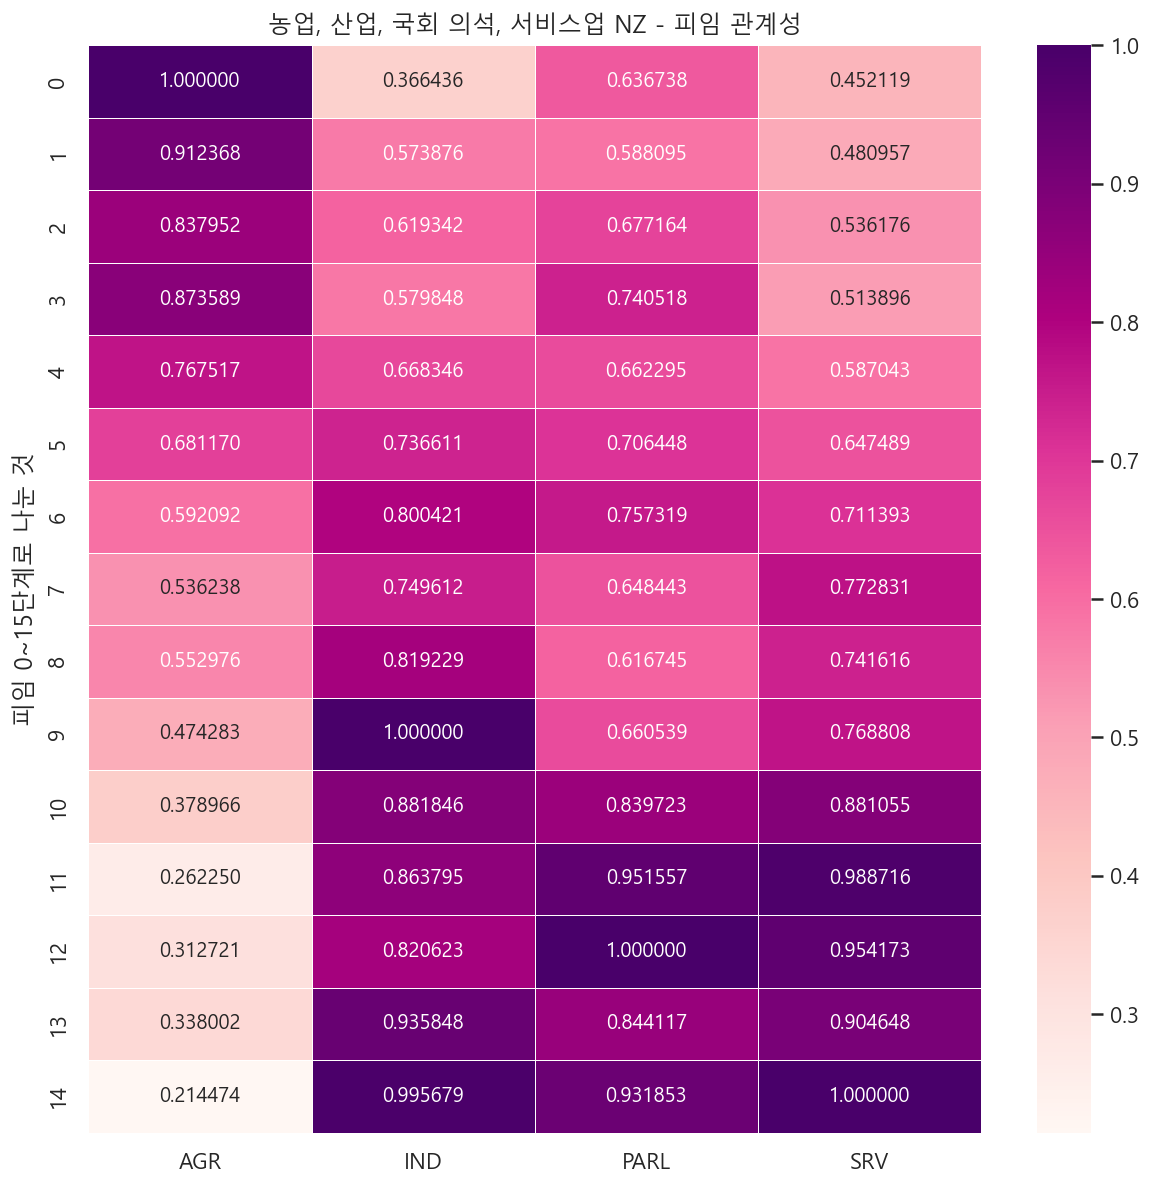

In [21]:
conP = cabgDT / cabgDT.max()                        

plt.figure(figsize=(10,10))
sns.heatmap(conP, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('농업, 산업, 국회 의석, 서비스업  - 피임 관계성')
plt.ylabel('피임 0~15단계로 나눈 것')
plt.show()

### 농업과 다른 직군들과의 관계성이 반대로 나타남!